# Regression linéaire



## Regression linéaire simple avec une seule feature

In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [121]:
df = pd.read_csv('Advertising.csv')

In [122]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [123]:
df = df[['TV','Radio','Newspaper','Sales']]

In [124]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [125]:
df['total_spend'] = df['TV'] + df['Radio'] + df['Newspaper']

In [126]:
df.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='Sales'>

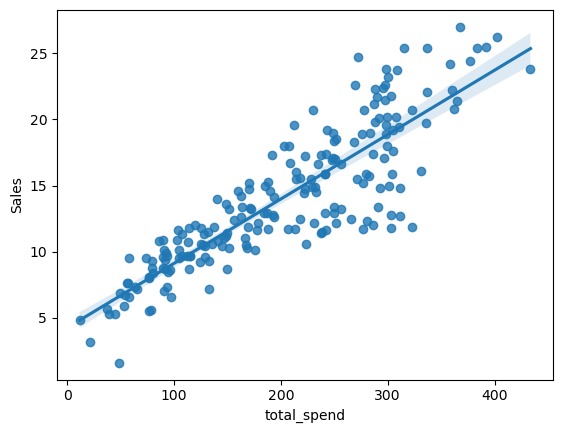

In [127]:
sns.regplot(data=df, x='total_spend',y='Sales')

In [128]:
X = df['total_spend']
y = df['Sales']

In [129]:
# y = mx + b
# y = B1x + B0
# polyfit renvoie la pente et l'ordonnée à l'origine pour résoudre l'équation
np.polyfit(X,y, deg=1)

array([0.04868788, 4.24302822])

In [130]:
potential_spend = np.linspace(0,500,100)

In [131]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

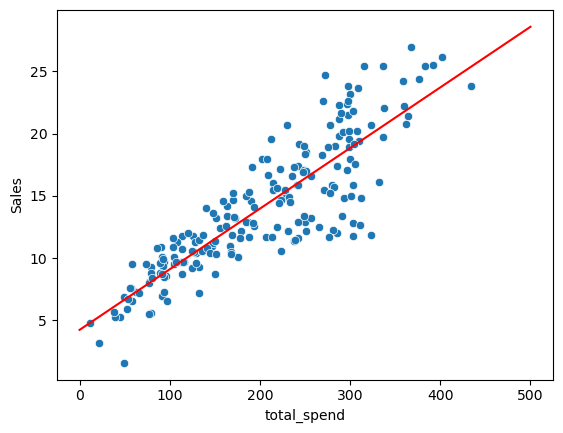

In [132]:
sns.scatterplot(x='total_spend', y='Sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
# nous avons le même résulat qu'avec regplot 

In [133]:
#exemple avec une valeur 

spend = 200 
predicted_sales = 0.04868788*spend + 4.24302822

In [134]:
predicted_sales

13.98060422

In [135]:
# Regression polynomial
# y = B3 * x**3 + B2 *x**2 + B1*x + B0
np.polyfit(X,y,deg=3)



array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [136]:
pot_spend = np.linspace(0,500,100)

In [137]:
# y = B3 * x**3 + B2 *x**2 + B1*x + B0
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2+8.20886302e-02*pot_spend+2.70495053e+00

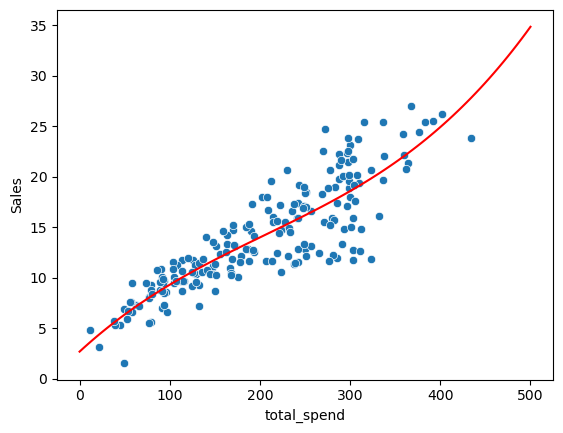

In [138]:
sns.scatterplot(x='total_spend', y='Sales', data=df)
plt.plot(pot_spend,pred_sales,color='red')
# la regression cubique permet de réaliser une relation non linéaire,elle peut rendre le modèle plus précis masi attentiion à l'overfitting (surapprentissage)

## Scikit-Learn

In [140]:
## Configuration des données 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



In [141]:
df = pd.read_csv('Advertising.csv')

In [142]:
df = df.drop('Unnamed: 0', axis=1)




In [143]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


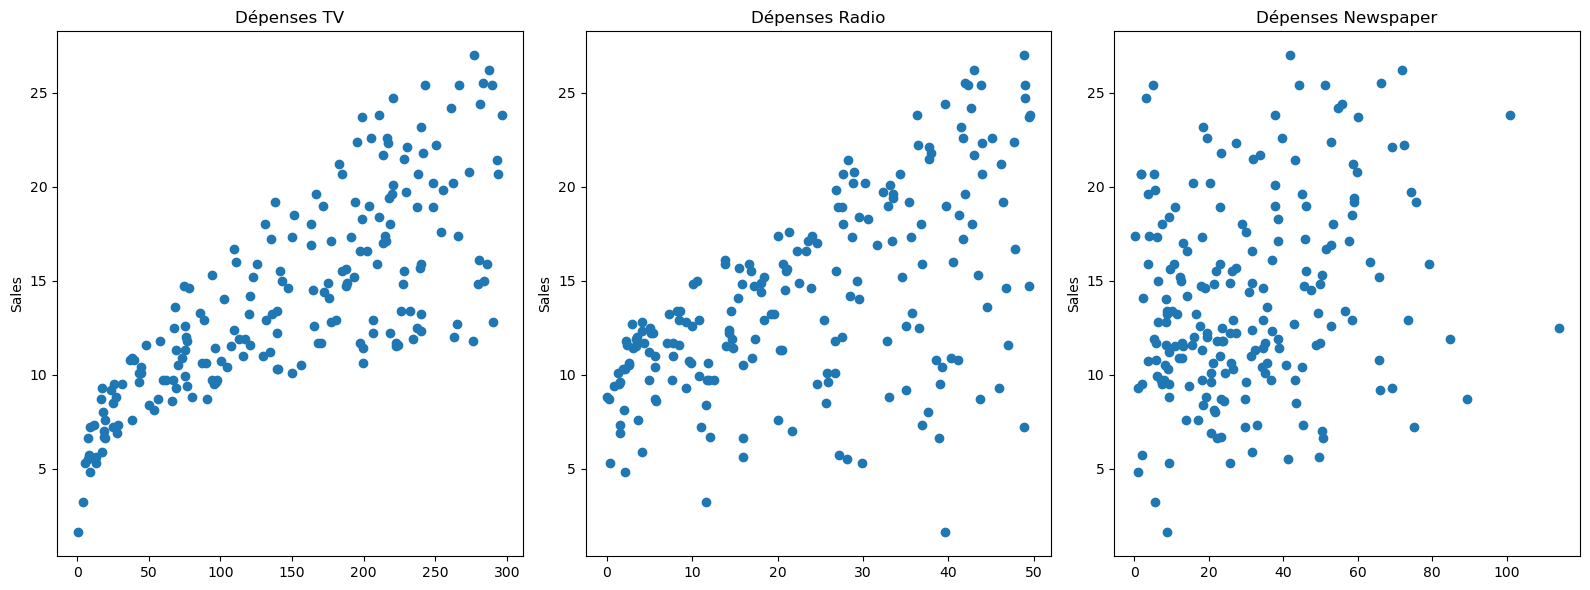

In [144]:
# Visualisation pour voir les tendances
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('Dépenses TV')


axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Dépenses Radio')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Dépenses Newspaper')

plt.tight_layout();

# On peut déja voir que Les dépense tv et les dépenses radio ont une correlation positive avec les ventes, à mesure qu'on augmente les dépenses publicitaires dans ces canaux, les ventes augmentent. Cependant pour les jourenaux c'est moins évident en augmentant les publicité sur els jourenaux on peut pas dire que les ventes vont augmenter.

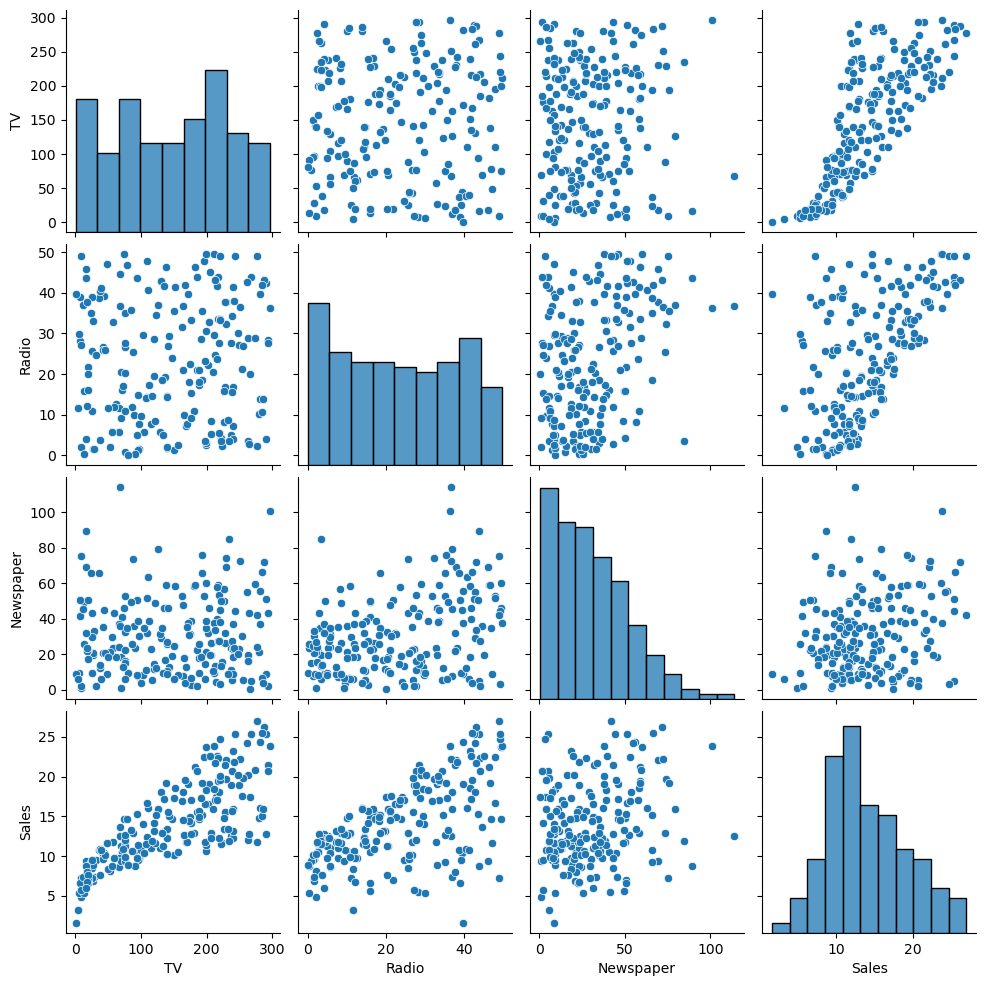

In [145]:
sns.pairplot(df)

In [146]:
# Séparer les données en features 
from sklearn.model_selection import train_test_split
X = df.drop('Sales', axis=1)

y = df['Sales']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [147]:
# Création du modèle
from sklearn.linear_model import LinearRegression

model = LinearRegression()


# Entrainement du modèle
model.fit(X_train, y_train)



LinearRegression()

## Evaluation des performances et Metric d'évaluations 



In [149]:
# Prédiction
test_predictions = model.predict(X_test)

<Axes: xlabel='Sales', ylabel='Count'>

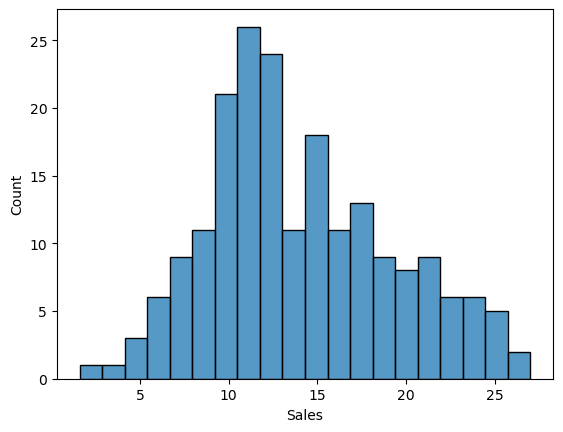

In [150]:
# comparaison des valeurs prédictes et réelles 
from sklearn.metrics import mean_absolute_error,mean_squared_error


sns.histplot(data=df,x='Sales', bins=20)

In [151]:
#Moyenne
df['Sales'].mean()

14.0225

In [152]:
# MAE Error
mean_absolute_error(y_test,test_predictions)
# Pour savoir si un MAE est bon il faut le comaprer à la distribution et à la moyenne de sales

1.2137457736144803

In [153]:
# MSE error
mean_squared_error(y_test,test_predictions)
# cette valeur nous ne pouvons pas la comparer direct à la mayenne car il est au carré

2.2987166978863782

In [154]:
# RMSE error 
np.sqrt(mean_squared_error(y_test,test_predictions))
# le RMSE permet de punir les valeurs aberrantes et de pouvoir les comaprer avec la moyenne en faisant la racine carrée.

1.516151937599388

In [155]:
## Les résidus : Correspond à la différence entre les valeurs preédcites et les valeurs réeles 
test_residuals = y_test - test_predictions
test_residuals 

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: Sales, dtype: float64

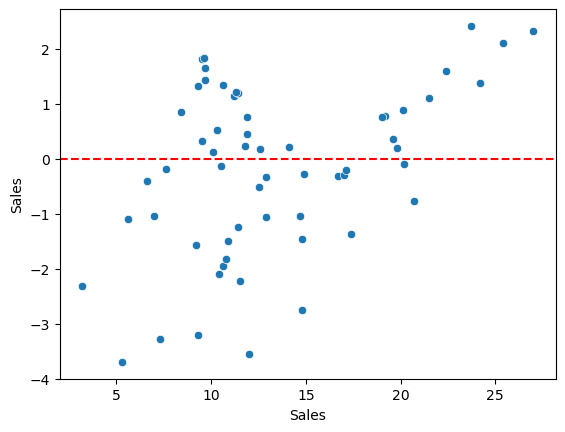

In [156]:
# visualisation des résidus comparé au valeurs réelles 
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

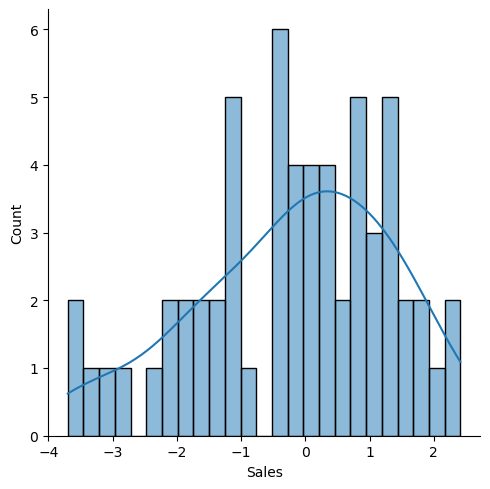

In [157]:
# visualisation distribution des résidus
sns.displot(test_residuals, bins=25,kde=True)

In [158]:
# Déploiement du model simple

final_model = LinearRegression()

final_model.fit(X,y)




LinearRegression()

In [159]:
# plus le coeff est élevé plus ca veut dire que si la features augmente la cible va augmenter 
# si la features augmente de 1 unité de 1000 dollars on peut s'attendre à une agmentation des ventes  du coeff
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [160]:
y_hat = final_model.predict(X)

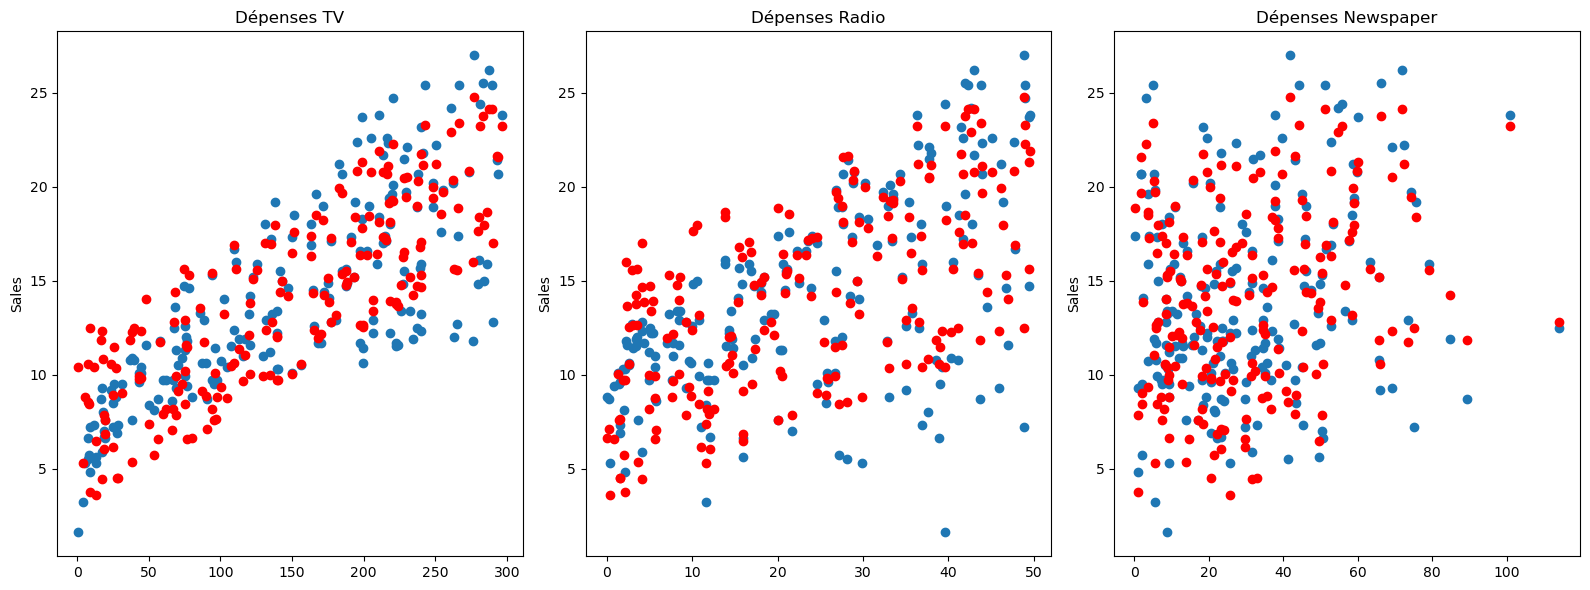

In [161]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('Dépenses TV')


axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Dépenses Radio')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Dépenses Newspaper')

plt.tight_layout();

In [162]:
from joblib import dump, load 

# sauvegarder un modèle 
dump(final_model,'final_sales_model.joslib')

['final_sales_model.joslib']

In [163]:
# charger un modèle
loaded_model = load('final_sales_model.joslib')

In [164]:
# Exemple de test avec notre model 
ads_values = [[149,22,12]]
X_cols =X.columns

campaign = pd.DataFrame(data=ads_values,columns=X_cols)
campaign

,TV,Radio,Newspaper
0,149,22,12


In [165]:
loaded_model.predict(campaign)

array([13.893032])


## Regression polynomiales

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df1 = pd.read_csv('Advertising.csv')


In [169]:

df1 = df1.drop('Unnamed: 0', axis=1)
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [170]:
X = df1.drop('Sales',axis=1)
y=df1['Sales']

In [171]:
# Création de features polynomiales 
from sklearn.preprocessing import PolynomialFeatures

In [172]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [173]:
poly_features = polynomial_converter.fit_transform(X)

In [174]:
poly_features.shape

(200, 9)

In [175]:
# on voit qu'il a fait 9 features 3 terme d'origine, 3 terme d'interactions entre eux et les 3 aux carré
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [176]:
# Entrainement du modèle polynomiale

In [177]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features,y,test_size=0.3,random_state=101)


In [178]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(X_train1,y_train1)

LinearRegression()

In [179]:
test_predictions = model.predict(X_test1)

In [180]:
# Evaluation du modèle polynomiale
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, test_predictions)

MSE = mean_squared_error(y_test,test_predictions)

RMSE = np.sqrt(MSE)

In [181]:
MAE

0.48967980448037096

In [182]:
RMSE

0.6646431757269152

In [183]:
model.coef_
#Plus le coefficient est grand (en valeur absolue), plus la variable influence fortement les ventes.
#Un coefficient positif → les ventes augmentent quand la variable augmente.
#Un coefficient négatif → les ventes diminuent quand la variable augmente.
#Mais pour savoir quelle variable influence le plus les ventes, il faut standardiser les données afin que les coefficients soient comparables entre elles.
#Les coefficients au carré (comme TV², Radio², etc.) représentent des effets non linéaires :
#un coefficient positif montre une accélération de l’effet, tandis qu’un coefficient négatif traduit une saturation ou un rendement décroissant.

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

## Ajustement des paramètres du modèle polynomiale


In [185]:
# Crée les différente ordres du polynome 

# split les features poly en train/test

# Fit sur les données de Training 

# Stocker/ enregistrer l'erreur RMSE pour A la fois le set de training et le set de Test

# Tracer les résultats (erreur vs ordre polynome)

In [186]:
train_rmse_errors = []
test_rmse_errors=[]

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train2, X_test2, y_train2, y_test2 = train_test_split(poly_features,y,test_size=0.3,random_state=101)

    model = LinearRegression()
    model.fit(X_train2, y_train2)

    train_pred = model.predict(X_train2)
    test_pred = model.predict(X_test2)

    train_rmse = np.sqrt(mean_squared_error(y_train2,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test2,test_pred))

    train_rmse_errors.append(train_rmse)

    test_rmse_errors.append(test_rmse)
    

In [187]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.4214253451953605,
 0.14198684885973445,
 0.1666628383038627]

In [188]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.3940440344732,
 4449.685935518502,
 95891.23665756262]

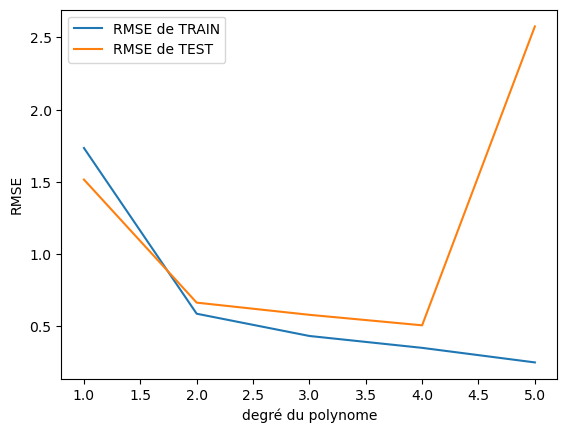

In [189]:
plt.plot(range(1,6),train_rmse_errors[:5],label='RMSE de TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label= 'RMSE de TEST')
plt.xlabel('degré du polynome')

plt.ylabel('RMSE')
plt.legend()

# on peut observer qu'à partir de 4 degree l'erreur commence a stabiliser et monter ce qui veut dire qu'il y a de l'overfitting


## Déploiement du modèle polynomiale 

In [191]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [192]:
full_converted_X = LinearRegression()

In [193]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [194]:
from joblib import dump, load 

In [195]:
dump(final_model,'final_poly_model.joblib')



['final_poly_model.joblib']

In [196]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [197]:
# Charger le convertisseur features
loaded_converter = load('final_converter.joblib')

In [198]:
# Charger le modèle 
loaded_model = load('final_poly_model.joblib')

In [199]:
#Prédir sur un nouveau dataset avec le modèle charger 
campaign =[[149,22,12]]

transformed_data = loaded_converter.fit_transform(campaign)

In [200]:
loaded_model.predict(transformed_data)

array([14.64501014])

## La régularisation Ridge

In [202]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [203]:
df3 = pd.read_csv('Advertising.csv') 

df3 = df3.drop('Unnamed: 0',axis=1)

X = df3.drop('Sales', axis=1) 

y = df3['Sales']

In [204]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

poly_features.shape

(200, 19)

In [205]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(poly_features,y, test_size=0.3,random_state=101)

In [206]:
# Standarisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# On entraine uniquement sur les donnée d'entrainement pour éviter la fuite de données
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Après le scaler
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [207]:
# Avant le scaler 
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

## Régularisation avec ridge 


In [209]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)

In [210]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [211]:
test_predictions= ridge_model.predict(X_test)

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,test_predictions)

RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))


In [213]:
MAE

0.5774404204714183

In [214]:
RMSE

0.8946386461319686

In [215]:
# Ajuster alpha le paramètre pour avoir la meilleur performance avec cross validation
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring='neg_mean_absolute_error')

In [216]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [217]:
# Demander au modèle quelle paramètre a le mieux performer
ridge_cv_model.alpha_

0.1

In [218]:
# Tester la performance avec le paramètre qui a le mieux performer 
test_predictions = ridge_cv_model.predict(X_test)

MAE=mean_absolute_error(y_test,test_predictions)

RMSE=np.sqrt(mean_squared_error(y_test, test_predictions))

In [219]:
# Mean absolute error en ayant optimiser avec le meilleur paramètre --> on a diminué l'overfitting, augmneter le biais (la généralisation)en ajoutant la régularisation et améliorer donc la performance
MAE

0.42737748843373746

In [220]:
# Mean Squared error en ayant optimiser avec le meilleur paramètre --> on a diminué l'overfitting, augmneter le biais (la généralisation)en ajoutant la régularisation et améliorer donc la performance
RMSE

0.6180719926921404

## Régularisation avec LASSO

In [222]:
from sklearn.linear_model import LassoCV

In [223]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100, cv=5)

In [224]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [225]:
# voir l'alpha le plus perrformant pour notre modèle 
lasso_cv_model.alpha_

0.4943070909225828

In [226]:
test_predictions = lasso_cv_model.predict(X_test)

In [227]:
MAE = mean_absolute_error(test_predictions,y_test)

RMSE = np.sqrt(mean_squared_error(test_predictions,y_test))

In [228]:
# Erreur MAE avec lasso 
MAE

0.6541723161252854

In [229]:
# Erreur RMSE avec lasso

RMSE

1.130800102276253

In [230]:
lasso_cv_model.coef_

#Lasso reste moins performant que celui de ridge mais il simplfie le modèle et devient plus simple à interpréter en prenant en compte uniquement deux features, le reste est à zero.
# On peut changer les hyperparamètres pour optimiser la performance 

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## La régularisation ELASTIC net 


In [232]:
from sklearn.linear_model import ElasticNetCV

In [233]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=0.001,n_alphas=100,max_iter=1000000)
# il s'agit de choisir dans l1_ration la proportion de lasso ou de ridge sachant que 0 c'est 100% ridge et 1 c'est Lasso entre plus on augmente et plsu c'est lasso, il va tester toutes les valeurs et voir quelle proportions de lasso et de ridge est la meilleure 

In [234]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [235]:
# Trouver le meilleur ratio, meilleur hyperparamètre du modèle qui donne le plus de performance
elastic_model.l1_ratio_

1.0

In [236]:
# Trouver le meilleure alpha meilleur hyperparamètre pour notre modèle 
elastic_model.alpha_

0.004943070909225827

In [237]:
elastic_model_predict = elastic_model.predict(X_test)

In [238]:
MAE = mean_absolute_error(elastic_model_predict,y_test)
RMSE = np.sqrt(mean_squared_error(elastic_model_predict,y_test))


In [239]:
# MAE du elastic net 
MAE

0.43350346185900673

In [240]:
# RMSE du elastic net
RMSE

0.6063140748984039

# Features enginering

In [242]:

data = pd.read_csv('AmesHousing.csv')

data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [243]:
## Explorer les outliers avec les features les plus correlées à la cible 
data.select_dtypes(include=['number']).corr()['SalePrice'].sort_values()


PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

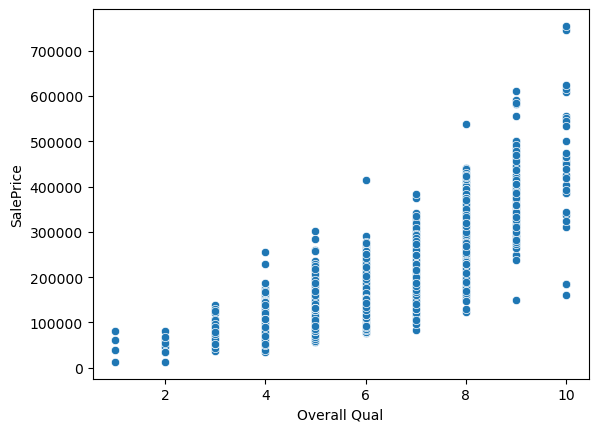

In [244]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=data)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

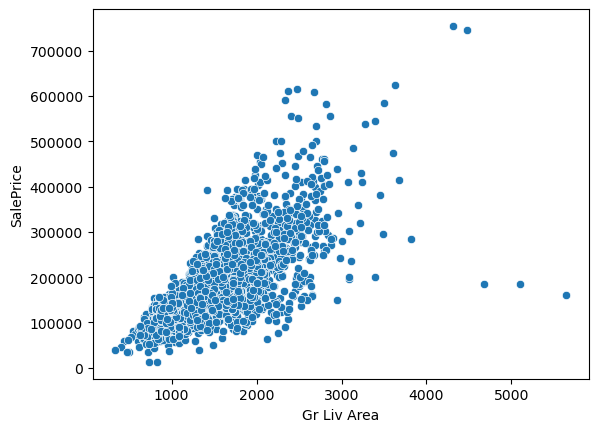

In [245]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [246]:
# Nous avons identifier ces trois outliers dans le data set pour les supprimer 
drop_ind= data[(data['Gr Liv Area']>4000)&(data['SalePrice']<400000)].index

In [247]:
drop_ind

Index([1498, 2180, 2181], dtype='int64')

In [248]:
data= data.drop(drop_ind,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

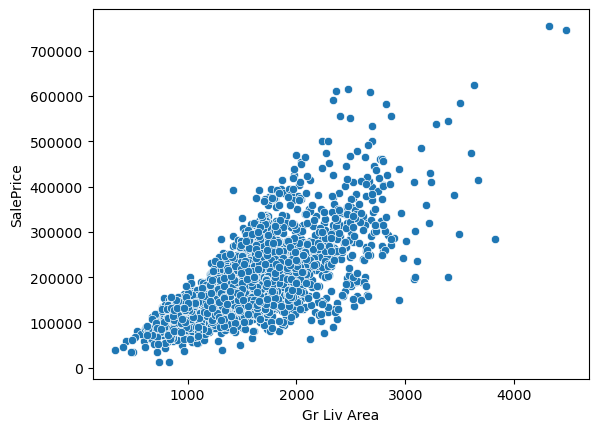

In [249]:
# Résultat finale 
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [250]:
# Sauvegarder le dataset modifié
data.to_csv('Ames_NO_outliers.csv')

## Traitements des données manquantes 

In [252]:
data2 = pd.read_csv('Ames_NO_outliers.csv')

In [253]:
data2

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [254]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2927 non-null   int64  
 1   Order            2927 non-null   int64  
 2   PID              2927 non-null   int64  
 3   MS SubClass      2927 non-null   int64  
 4   MS Zoning        2927 non-null   object 
 5   Lot Frontage     2437 non-null   float64
 6   Lot Area         2927 non-null   int64  
 7   Street           2927 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2927 non-null   object 
 10  Land Contour     2927 non-null   object 
 11  Utilities        2927 non-null   object 
 12  Lot Config       2927 non-null   object 
 13  Land Slope       2927 non-null   object 
 14  Neighborhood     2927 non-null   object 
 15  Condition 1      2927 non-null   object 
 16  Condition 2      2927 non-null   object 
 17  Bldg Type     

In [255]:
data2.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [256]:
data2 = data2.drop(['Unnamed: 0','Order','PID'],axis=1)

In [257]:
data2.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [258]:
# Trouver les valeurs null
100 * data2.isnull().sum() / len(data2)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [259]:
def percent_missing(data2):
    percent_nan = 100 * data2.isnull().sum() / len(data2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [260]:
percent_nan = percent_missing(data2)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

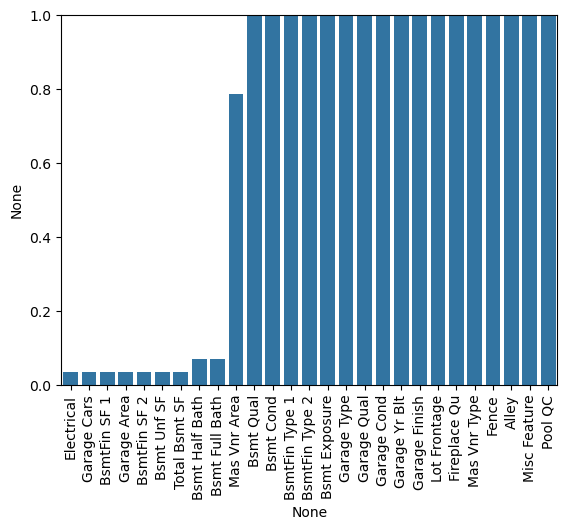

In [261]:
# Voir les features avec moins de 1 % de valeurs manquantes 
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [262]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [263]:
data2[data2['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [264]:
# Supression des lignes pour ces colonnes manquantes
data2 = data2.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [265]:
# Mise à jour des valeurs manquantes 
percent_nan = percent_missing(data2)

percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

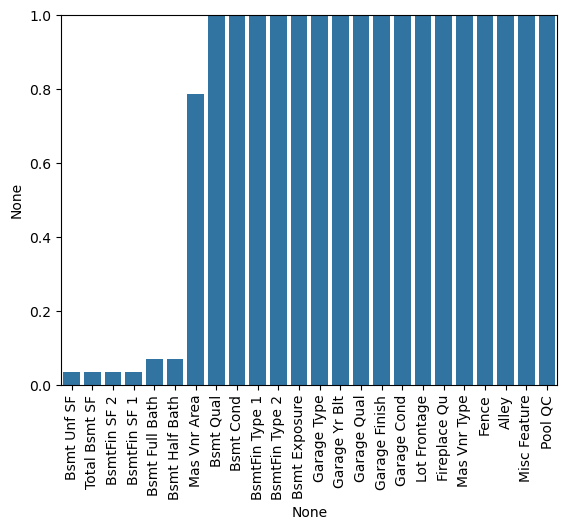

In [266]:
# Voir les features avec moins de 1 % de valeurs manquantes 
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [267]:
# on peut déduire que ces maisons n'ont tout simplement pas de sous sol
data2[data2['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [268]:
# on peut déduire que ces maisons n'ont tout simplement pas de sous sol
data2[data2['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [269]:
# Colonnes numériques de BSMT --> compléter par 0 avec fillna
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

data2[bsmt_num_cols] = data2[bsmt_num_cols].fillna(0)
# Colonnes String de BSMT 
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
data2[bsmt_str_cols] = data2[bsmt_str_cols].fillna('None')

In [270]:
data2[data2['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [271]:
# Mise à jour des valeurs manquantes 
percent_nan = percent_missing(data2)

(0.0, 1.0)

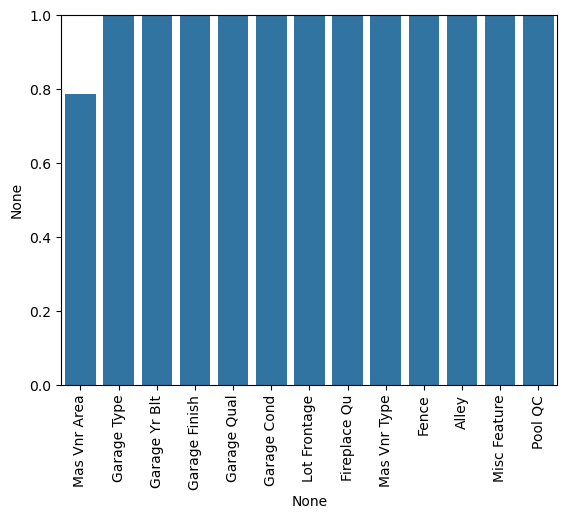

In [272]:
# Voir les features avec moins de 1 % de valeurs manquantes 
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [273]:
data2['Mas Vnr Area'] = data2['Mas Vnr Area'].fillna(0)

data2['Mas Vnr Type'] = data2['Mas Vnr Type'].fillna('None')

In [274]:
percent_nan = percent_missing(data2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

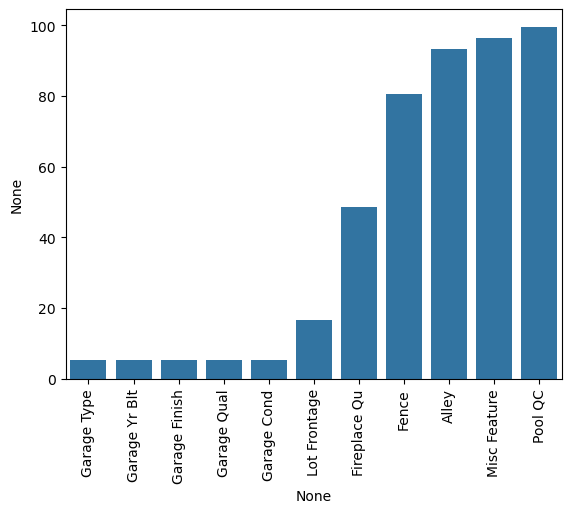

In [275]:

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


## Traiter les données manquantes en fonction des colonnes 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

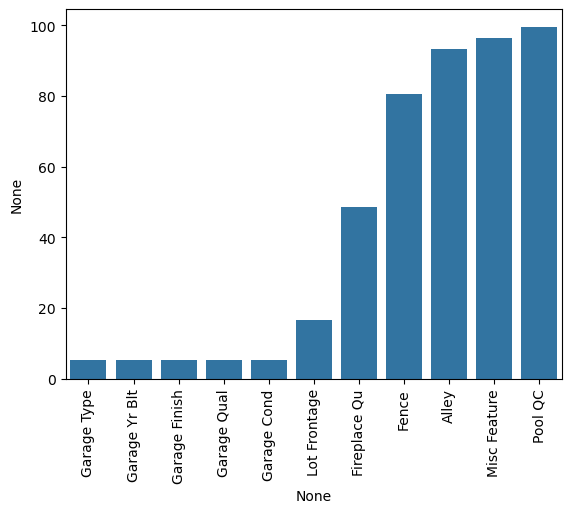

In [277]:

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [278]:
# Remplacement des valeurs nul des features garages par none 
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
data2[gar_str_cols] = data2[gar_str_cols].fillna('None')

In [279]:
percent_nan = percent_missing(data2)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

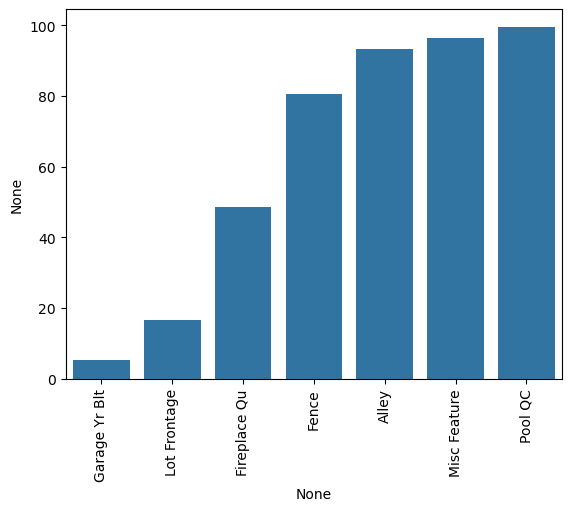

In [280]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [281]:
data2['Garage Yr Blt'] = data2['Garage Yr Blt'].fillna(0)

In [282]:
percent_nan = percent_missing(data2)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

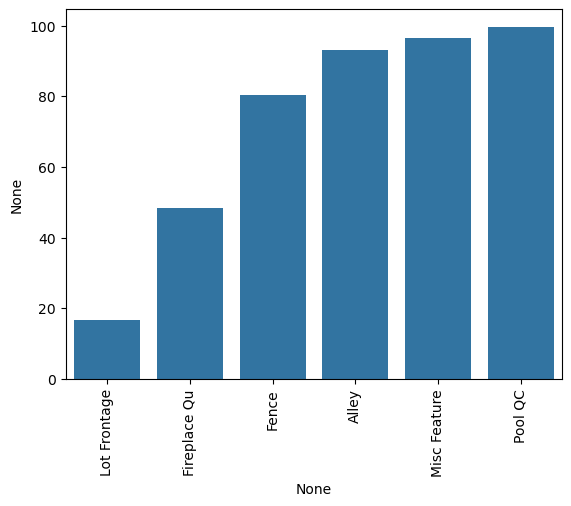

In [283]:

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [284]:
# Supprimer les colonnes entière avec trop de valeurs manquantes 
data2 = data2.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [285]:
percent_nan = percent_missing(data2)

([0, 1], [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

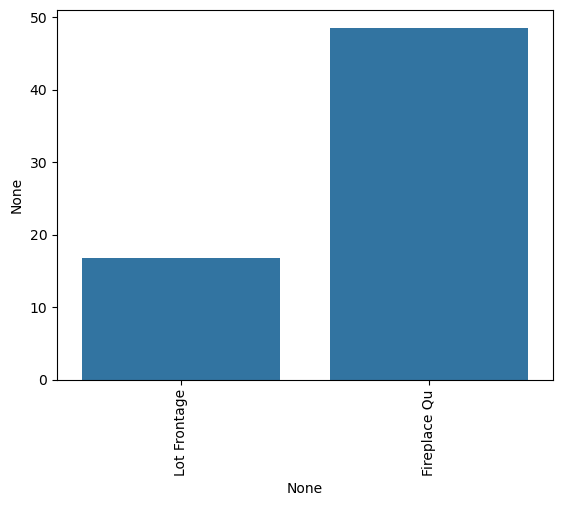

In [286]:
# Il reste deux valeurs manquantes 
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [287]:
data2['Fireplace Qu'] = data2['Fireplace Qu'].fillna("None")

In [288]:
percent_nan = percent_missing(data2)

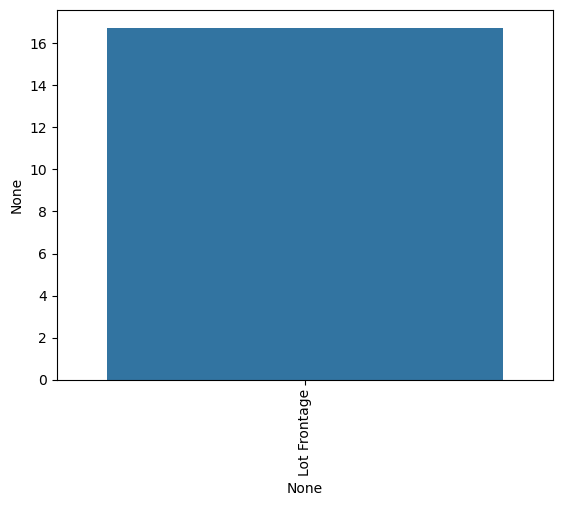

In [289]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Imputation sur les Données Manquantes
Pour imputer les données manquantes, nous devons décider quelle autre feature bien complétée (pas de valeurs NaN) est la plus corrélée aux données de la feature manquante. Dans ce cas particulier, nous utiliserons :

"Neighborhood" : Emplacements physiques (quartiers) dans les limites de la ville d'Ames

"Lot Frontage" : Longueur (en pied) de la rue devant la propriété

Nous partons du principe que la longeur du lot (Lot Frontage) est liée au quartier (Neighborhood) dans lequel se trouve la maison.

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

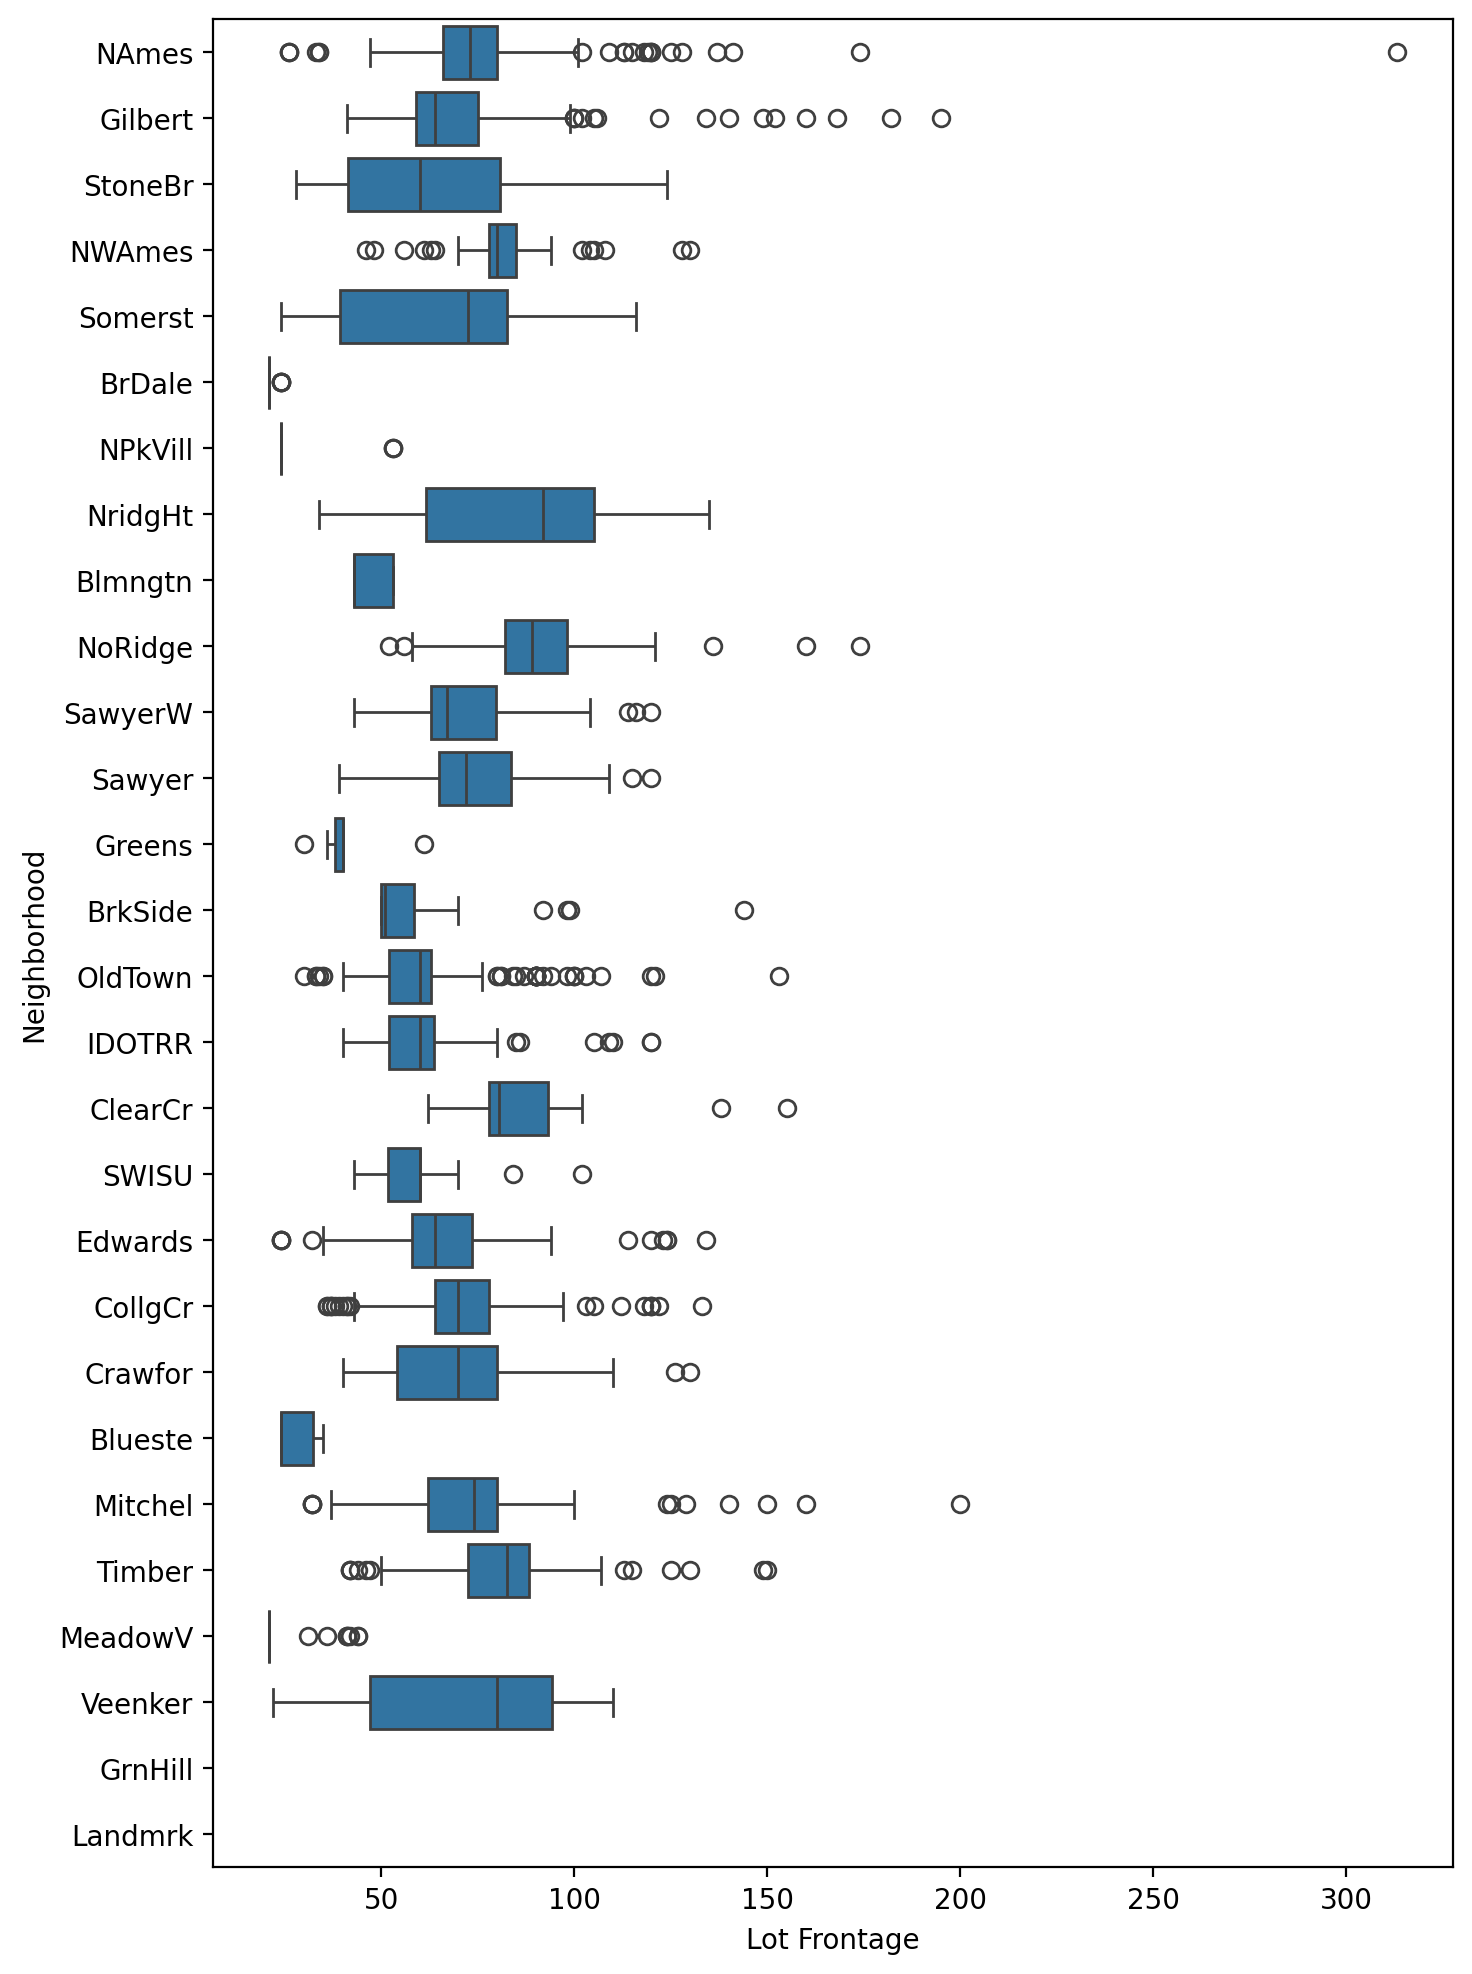

In [291]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=data2, orient='h')

In [292]:
# Faire la moyenne du lot frontage par quartiers pour remplacer les valeurs manquantes
data2.groupy('Neighborhood')['Lot Frontage'].mean()

AttributeError: 'DataFrame' object has no attribute 'groupy'

In [ ]:
# Faire la moyenne du lot frontage par quartiers pour remplacer les valeurs manquantes automatiquement
data2['Lot Frontage'] = data2.groupby('Neighborhood')['Lot Frontage'].transform(lambda value:value.fillna(value.mean()))

In [ ]:
data2.isnull().sum()

In [ ]:
data2['Lot Frontage'] = data2['Lot Frontage'].fillna(0)

In [ ]:
data2.isnull().sum()

## Les données catégorielles

In [ ]:
data2 = pd.read_csv('')
data2['Ms SubClass'] = data2['Ms SubClass'].apply(str)

In [ ]:
data2.select_dtypes(include=True)

data2.head()